**Pressione SHIFT+ENTER para executar a célula**

# Alegrete

Este notebook fornece algumas visualizações para o trabalho de regressão linear. Para conseguir usar, implemente as funções no seu `alegrete.py` e tenha as bibliotecas `numpy` e `matplotlib` instaladas.

O notebook usa um conjunto de dados sintetico. Adapte-o para carregar e usar os dados do `alegrete.csv`.

### Imports das bibliotecas de plot e da solucao implementada

In [2]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import alegrete

### Visualizacao dos dados

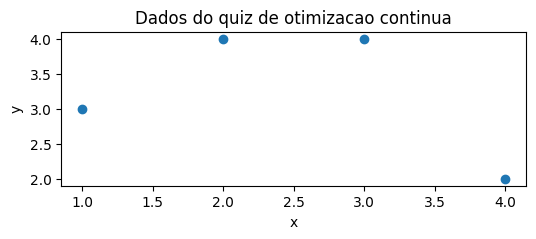

In [3]:
# dataset do Quiz de Otimizacao Continua -- troque para carregar o alegrete.csv
quiz_data = np.array([
    [1, 3],
    [2, 4],
    [3, 4],
    [4, 2]
])

#Gráfico dos dados
plt.figure(figsize=(6, 2))
plt.scatter(quiz_data[:,0], quiz_data[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados do quiz de otimizacao continua')
plt.show()

### Execucao da regressao linear e calculo do EQM por epoca/iteracao

[0, 1.55, 0.44999999999999973, 1.1275000000000002, 0.6157499999999998, 0.9026000000000001, 0.6560174999999999, 0.7684952499999999, 0.64195995, 0.6771098974999998, 0.60540693675, 0.6067435143999999, 0.5605375632074999, 0.5475445533222498, 0.5136127820815499, 0.4949877942839273, 0.4673446466381857, 0.44694546027600845, 0.4228576583976231, 0.40237184669869247, 0.38056903196806274, 0.360712409944569, 0.34058359376261155, 0.3216381445927532, 0.3028707793235235, 0.28492602778234655, 0.26734381489499426, 0.25040506252702366, 0.23389499843985326, 0.21793179017452138, 0.20241128603826095, 0.1873790494249173, 0.1727810507523449, 0.15863069735189966, 0.1448968921945941, 0.1315790209371131, 0.11865668620762025, 0.10612336947140957, 0.0939638568763761, 0.08216934721932896, 0.07072731113544321, 0.05962826903319689, 0.0488612329479972, 0.0384167447559772, 0.028284824842991343, 0.018456331544282535, 0.008922035611229251, -0.00032677381284750354, -0.009298708996555239, -0.018002015677317483, -0.0264447

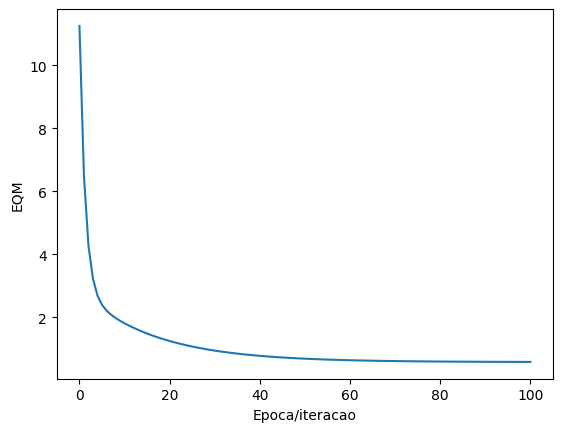

In [4]:
theta_0s, theta_1s = alegrete.fit(quiz_data, theta_0=0, theta_1=0, alpha=0.1, num_iterations=100)

# valores finais de theta0 e theta1
final_th0, final_th1 = theta_0s[-1], theta_1s[-1]

mse_list = [alegrete.compute_mse(th0, th1, quiz_data) for th0, th1 in zip(theta_0s, theta_1s)]
print(f"EQM final: {mse_list[-1]}")


plt.plot(mse_list)
plt.xlabel('Epoca/iteracao')
plt.ylabel('EQM')
plt.show()

### Plot da curva final

[0, 1.55, 0.44999999999999973, 1.1275000000000002, 0.6157499999999998, 0.9026000000000001, 0.6560174999999999, 0.7684952499999999, 0.64195995, 0.6771098974999998, 0.60540693675, 0.6067435143999999, 0.5605375632074999, 0.5475445533222498, 0.5136127820815499, 0.4949877942839273, 0.4673446466381857, 0.44694546027600845, 0.4228576583976231, 0.40237184669869247, 0.38056903196806274, 0.360712409944569, 0.34058359376261155, 0.3216381445927532, 0.3028707793235235, 0.28492602778234655, 0.26734381489499426, 0.25040506252702366, 0.23389499843985326, 0.21793179017452138, 0.20241128603826095, 0.1873790494249173, 0.1727810507523449, 0.15863069735189966, 0.1448968921945941, 0.1315790209371131, 0.11865668620762025, 0.10612336947140957, 0.0939638568763761, 0.08216934721932896, 0.07072731113544321, 0.05962826903319689, 0.0488612329479972, 0.0384167447559772, 0.028284824842991343, 0.018456331544282535, 0.008922035611229251, -0.00032677381284750354, -0.009298708996555239, -0.018002015677317483, -0.0264447

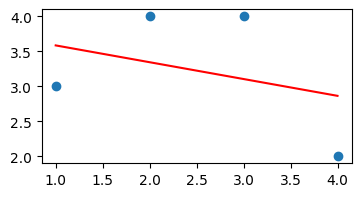

In [5]:
theta_0s, theta_1s = alegrete.fit(
    quiz_data, theta_0=0, theta_1=0, 
    alpha=0.1, num_iterations=100
)

# valores finais de theta0 e theta1
final_th0, final_th1 = theta_0s[-1], theta_1s[-1]

#Imprimir parâmetros otimizados
print (f'Curva encontrada: {final_th1}*x + {final_th0}')

#plota os dados
plt.figure(figsize=(4, 2))
plt.scatter(quiz_data[:,0], quiz_data[:,1])

# plota a curva de ajuste
pred = final_th1*quiz_data[:,0] + final_th0
plt.plot(quiz_data[:,0], pred, c='r')
plt.show()

### Progresso da descida do gradiente com o número de iterações

Execute a celula e use os controles abaixo do grafico para visualizar o progresso do seu ajuste

Pode aparecer um grafico "extra" abaixo da animacao, apenas ignore.

C:\Users\leohe\AppData\Local\Temp\ipykernel_12256\335828031.py:18: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=101.
  ani = animation.FuncAnimation(fig, animate, frames=len(theta_0s), interval=20, save_count=50)


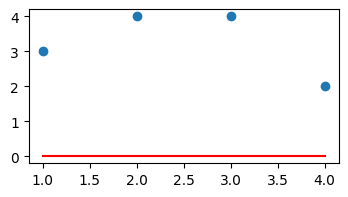

In [6]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)

# conjunto de dados
ax.scatter(quiz_data[:,0], quiz_data[:,1])

# linha com os valores iniciais dos parametros
pred = theta_1s[0]*quiz_data[:,0] + theta_0s[0]
line, = ax.plot(quiz_data[:,0], pred, '-',c='r')

# funcao que atualiza a linha a cada passo
def animate(i):
    pred = theta_1s[i] * quiz_data[:,0] + theta_0s[i]
    line.set_ydata(pred)
    return line,

# mude interval para trocar a velocidade da animacao
ani = animation.FuncAnimation(fig, animate, frames=len(theta_0s), interval=20, save_count=50)
HTML(ani.to_jshtml())